In [1]:
library(ggplot2)
library(reshape2)

In [2]:
HOMICIDES <- read.csv('misc-files/all_homicides.csv',
                      stringsAsFactors = FALSE)

In [3]:
print(names(HOMICIDES))

 [1] "ID"                      "coroners.case.number"   
 [3] "police.case.number"      "da.case.number"         
 [5] "first.name"              "middle.name"            
 [7] "last.name"               "suffix"                 
 [9] "slug"                    "age"                    
[11] "cause"                   "security.hold"          
[13] "gender"                  "race"                   
[15] "day.of.week"             "neighborhoodv5_id"      
[17] "neighborhoodv6_id"       "jurisdiction_id"        
[19] "coroners.description"    "death.date"             
[21] "death.time"              "died.on.scene"          
[23] "incident.address"        "incident.zipcode"       
[25] "blog.item.url"           "image"                  
[27] "officer.involved"        "law.enforcement.officer"
[29] "domestic.violence"       "ruling"                 
[31] "incident.point.4326"     "incident.point.900913"  
[33] "incident.point.3857"     "full.name"              
[35] "formatted.death.date"    

In [4]:
day_info <- HOMICIDES[,c(1,10,11,14,15)]
names(day_info) <- c('id','age','cause','race','day')

In [5]:
head(day_info)

,id,age,cause,race,day
1,14694,33,gunshot,latino,tuesday
2,14691,32,stabbing,white,tuesday
3,14690,28,gunshot,latino,monday
4,14693,22,gunshot,latino,monday
5,14668,20,gunshot,black,sunday
6,14698,16,gunshot,black,sunday


In [6]:
str(day_info)

'data.frame':	14302 obs. of  5 variables:
 $ id   : int  14694 14691 14690 14693 14668 14698 14696 14695 14661 14692 ...
 $ age  : int  33 32 28 22 20 16 39 30 37 42 ...
 $ cause: chr  "gunshot" "stabbing" "gunshot" "gunshot" ...
 $ race : chr  "latino" "white" "latino" "latino" ...
 $ day  : chr  "tuesday" "tuesday" "monday" "monday" ...


In [7]:
day_info$day <- factor(day_info$day,
                       levels = c("monday","tuesday","wednesday","thursday","friday","saturday","sunday"),
                       ordered = TRUE)

In [8]:
table(day_info$day) / nrow(day_info)


   monday   tuesday wednesday  thursday    friday  saturday    sunday 
0.1374633 0.1259964 0.1191442 0.1209621 0.1342470 0.1724934 0.1896937 

In [9]:
table(day_info$race) / nrow(day_info)


                    asian        black       latino        other        white 
0.0112571668 0.0374772759 0.3391833310 0.4928681303 0.0005593623 0.1186547336 

In [10]:
prop.table(table(day_info$race, day_info$day), 1)

        
            monday   tuesday wednesday  thursday    friday  saturday    sunday
         0.1055901 0.1801242 0.1801242 0.0931677 0.1490683 0.1614907 0.1304348
  asian  0.1361940 0.1250000 0.1324627 0.0988806 0.1399254 0.1772388 0.1902985
  black  0.1418264 0.1329623 0.1290456 0.1278087 0.1366729 0.1653267 0.1663575
  latino 0.1320755 0.1171797 0.1089516 0.1120726 0.1306568 0.1804511 0.2186126
  other  0.2500000 0.1250000 0.0000000 0.0000000 0.2500000 0.0000000 0.3750000
  white  0.1502652 0.1378904 0.1237478 0.1484973 0.1384797 0.1602829 0.1408368

In [11]:
byraceday <- data.frame(prop.table(table(day_info$race, day_info$day), 1))
names(byraceday) <- c("race","day","percent")
byraceday <- byraceday[byraceday$race %in% c('black','latino','white'),]

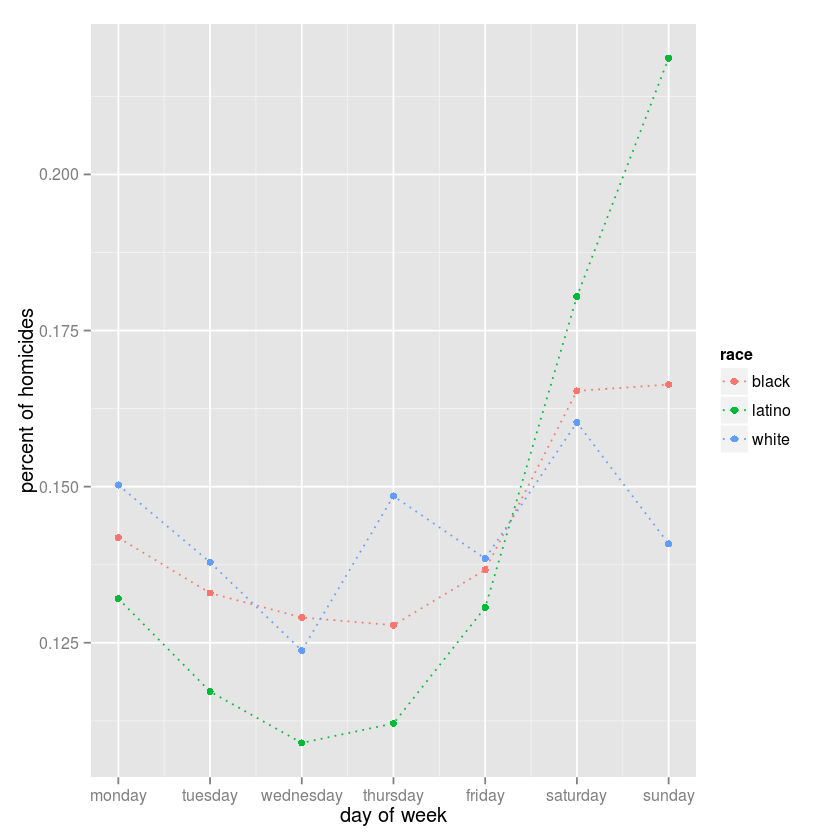

In [16]:
ggplot(byraceday, aes(x = as.numeric(day), y = percent, group = race, color = race)) + 
geom_line(linetype="dotted") +
geom_point() +
scale_x_continuous(breaks = 1:7,
                   labels=c('monday','tuesday','wednesday','thursday','friday','saturday','sunday')) +
labs(x = "day of week", y = "percent of homicides")

In [17]:
day_info$weekend <- day_info$day %in% c("friday","saturday","sunday")

In [22]:
prop.table(table(day_info$race, day_info$weekend), 1)

        
             FALSE      TRUE
         0.5590062 0.4409938
  asian  0.4925373 0.5074627
  black  0.5316430 0.4683570
  latino 0.4702795 0.5297205
  other  0.3750000 0.6250000
  white  0.5604007 0.4395993

In [24]:
model <- glm(weekend ~ race, data = day_info, family = "binomial")

In [25]:
summary(model)


Call:
glm(formula = weekend ~ race, family = "binomial", data = day_info)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.401  -1.190  -1.076   1.127   1.282  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.237130   0.158730  -1.494   0.1352  
raceasian    0.266983   0.180719   1.477   0.1396  
raceblack    0.110389   0.161316   0.684   0.4938  
racelatino   0.356152   0.160514   2.219   0.0265 *
raceother    0.747955   0.747229   1.001   0.3168  
racewhite   -0.005659   0.166094  -0.034   0.9728  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 19826  on 14301  degrees of freedom
Residual deviance: 19755  on 14296  degrees of freedom
AIC: 19767

Number of Fisher Scoring iterations: 3
